<IMG src="cifar10_images.jpg" width="375" height="60">

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
# bir boyutlu haline getirelim
y_test = y_test.reshape(-1,)

In [7]:
y_test 

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [8]:
# resim sınıfları için array oluşturuyorum
resim_siniflari = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [9]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])        
    plt.xlabel(resim_siniflari[y[index]])
    plt.show()

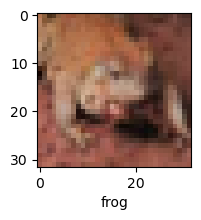

In [10]:
plot_sample(X_test, y_test, 5)

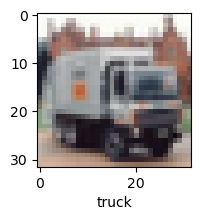

In [11]:
plot_sample(X_test, y_test, 11)

In [12]:
#normalizasyon yapalım 
# RGB olarak 3 kanal ve her pixel 0-255 aralığında olduğundan 255 ya bölmek yeterli
X_train = X_train / 255
X_test = X_test / 255

In [14]:
# Derin öğrenme modeli oluştur
deep_learning_model = models.Sequential([
    # ilk katman 32x32 boyutunda gri görüntüleri alır, 32 filtre ve relu aktivasyon fonksiyonu kullanılır
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    # ilk havuzlama katmanı: Özelliklerin boyutunu küçültür
    layers.MaxPooling2D((2, 2)),
    
    # ikinci konvolüsyon katmanı
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    #ikinci havuzlama katmanı
    layers.MaxPooling2D((2, 2)),
    
    # Flatten katmanı: Çok boyutlu çıktıyı 1 boyutlu hale getirir
    layers.Flatten(),
    # Tam bağlantılı katman: Sinir ağının sonuna eklenir
    layers.Dense(64, activation='relu'),
    # Çıkış katmanı: 10 sınıf için softmax aktivasyonu kullanır
    layers.Dense(10, activation='softmax')
])

In [17]:
# Modeli derlemek için kullanılan ayarları tanımlar.
deep_learning_model.compile(
    optimizer='adam',  # 'adam' optimizasyon algoritması, öğrenme hızını otomatik olarak ayarlar.
    loss='sparse_categorical_crossentropy',  # Çok sınıflı sınıflandırma için uygun kayıp fonksiyonu.
    metrics=['accuracy']  # Modelin doğruluğunu izlemek için kullanılacak metrik.
)

In [18]:
# Modelin eğitim sürecini başlatır. 
# X_train: Giriş verileri, y_train: Hedef etiketler.
# epochs=5: Modelin verilerle 5 kez eğitim almasını belirtir.
deep_learning_model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 31s 20ms/step - loss: 1.4588 - accuracy: 0.4769
Epoch 2/5
1563/1563 [==============================] - 35s 23ms/step - loss: 1.1026 - accuracy: 0.6156
Epoch 3/5
1563/1563 [==============================] - 40s 25ms/step - loss: 0.9726 - accuracy: 0.6615
Epoch 4/5
1563/1563 [==============================] - 39s 25ms/step - loss: 0.8867 - accuracy: 0.6932
Epoch 5/5
1563/1563 [==============================] - 41s 26ms/step - loss: 0.8194 - accuracy: 0.7152


In [19]:
# Test verileri üzerinde modelin performansını değerlendirir.
# X_test: Test verileri, y_test: Test verilerinin gerçek etiketleri.
# Fonksiyon, kayıp ve doğruluk gibi performans ölçütlerini döner.
deep_learning_model.evaluate(X_test,y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.9659 - accuracy: 0.6653


[0.9658674597740173, 0.6653000116348267]

In [20]:
# X_test veri seti ile deep_learning_model modelinden tahmin edilen sonuçları y_pred değişkenine atıyoruz.
# Ardından, y_pred değişkeninin ilk 3 tahminini görüntülüyoruz.
y_pred = deep_learning_model.predict(X_test)
y_pred[:3]

array([[1.2112646e-03, 3.6368656e-04, 5.9693898e-03, 5.3433567e-01,
        4.1801645e-03, 2.8263208e-02, 3.5652870e-01, 5.9015125e-05,
        6.8500936e-02, 5.8791635e-04],
       [2.8348705e-01, 2.2429395e-01, 1.3795838e-04, 1.3903668e-04,
        1.4924996e-06, 3.2568767e-06, 8.0616883e-07, 1.9710278e-06,
        4.9066001e-01, 1.2744446e-03],
       [1.3499355e-01, 3.6493632e-01, 1.2960560e-03, 5.2175643e-03,
        7.5295934e-04, 6.6510309e-04, 6.8160321e-04, 3.1466121e-04,
        4.6692404e-01, 2.4218166e-02]], dtype=float32)

In [21]:
# y_pred içindeki her bir tahmin sonucunun en yüksek olasılığa sahip sınıfını belirliyoruz.
# np.argmax() fonksiyonu, en yüksek değere sahip indeks numarasını döndürüyor.
# Bu işlem sonucunda elde edilen sınıf tahminlerini y_predictions_siniflari listesine atıyoruz
# ve ilk 3 sınıf tahminini görüntülüyoruz.
y_predictions_siniflari = [np.argmax(element) for element in y_pred]
y_predictions_siniflari[:3]

[3, 8, 8]

In [22]:
# y_test veri setinin ilk 5 gerçek sınıf etiketini görüntülüyoruz.
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [23]:
# X_test ve y_test veri setindeki örneklerin (0, 1, 2) indeksli görsellerini çiziyoruz.
# Her bir görselin tahmin edilen sınıfını resim_siniflari listesi kullanarak görüntülüyoruz.

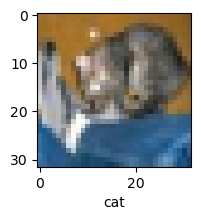

In [24]:
# 0. indeksli örneği çiziyoruz ve modelin tahmin ettiği sınıfı gösteriyoruz.
plot_sample(X_test, y_test, 0)

In [25]:
resim_siniflari[y_predictions_siniflari[0]]

'cat'

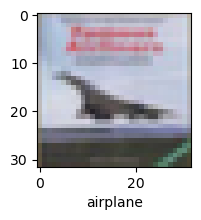

In [37]:
# 3. indeksli örneği çiziyoruz ve modelin tahmin ettiği sınıfı gösteriyoruz.
plot_sample(X_test, y_test, 3)

In [36]:
resim_siniflari[y_predictions_siniflari[3]]

'airplane'

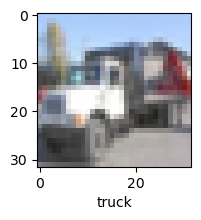

In [42]:
# 45. indeksli örneği çiziyoruz ve modelin tahmin ettiği sınıfı gösteriyoruz.
plot_sample(X_test, y_test, 45)

In [41]:
resim_siniflari[y_predictions_siniflari[45]]

'truck'

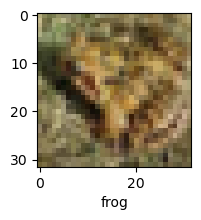

In [32]:
# 511. indeksli örneği çiziyoruz ve modelin tahmin ettiği sınıfı gösteriyoruz.
plot_sample(X_test, y_test, 511)

In [33]:
resim_siniflari[y_predictions_siniflari[511]]

'frog'

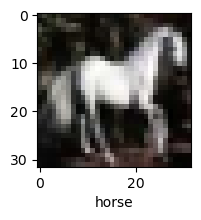

In [55]:
# 13. indeksli örneği çiziyoruz ve modelin tahmin ettiği sınıfı gösteriyoruz.
plot_sample(X_test, y_test, 13)

In [56]:
resim_siniflari[y_predictions_siniflari[13]]

'horse'